In [1]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from bs4 import BeautifulSoup

df=pd.read_excel("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\geo_ciudades_parcial_ciber.xlsx")
# 2 vez con muchas ms ips

In [2]:
# Cambiar el nombre de las columnas
df.columns = ["Id", 'Ciudad', 'Pais', "Latitud", 'Longitud']


ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        3629 non-null   int64  
 1   Ciudad    3629 non-null   object 
 2   Pais      3629 non-null   object 
 3   Latitud   630 non-null    float64
 4   Longitud  630 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 141.9+ KB


In [ ]:
df

Unnamed: 0     Id          Ciudad          Pais    Latitud   Longitud
0              0  35001        Shimoga,     Rajasthan        NaN        NaN
1              1  35002        Raichur,        Sikkim        NaN        NaN
2              2  35003  Muzaffarnagar,        Punjab        NaN        NaN
3              3  35004       Bareilly,     Meghalaya        NaN        NaN
4              4  35005         Imphal,     Meghalaya        NaN        NaN
...          ...    ...             ...           ...        ...        ...
3624        3624  39991        Sambhal,         Assam        NaN        NaN
3625        3625  39992      Faridabad,       Haryana  28.403148  77.310556
3626        3626  39993        Solapur,  Chhattisgarh        NaN        NaN
3627        3627  39995         Nashik,       Manipur        NaN        NaN
3628        3628  39996       Vadodara,       Mizoram        NaN        NaN

[3629 rows x 6 columns]

In [ ]:
df.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\geo_ciudades_parcial_ciber.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3629 entries, 0 to 3628
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3629 non-null   int64  
 1   Id          3629 non-null   int64  
 2   Ciudad      3629 non-null   object 
 3   Pais        3629 non-null   object 
 4   Latitud     630 non-null    float64
 5   Longitud    630 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 170.2+ KB


In [ ]:
len(df.Ciudad.unique())
#df.Ciudad.unique()

300

In [ ]:
len(df.Pais.unique())

21

In [ ]:
# Eliminar filas con NaN en Latitud o Longitud
df_cleaned = df.dropna(subset=['Latitud', 'Longitud'])

# Crear tuplas de (Latitud, Longitud) para cada fila
tuplas_geo = df_cleaned.apply(lambda row: (row['Latitud'], row['Longitud']), axis=1)

# Mostrar las tuplas resultantes
print(tuplas_geo)


10      (21.281625, 79.626577)
15      (24.948278, 81.402552)
17       (19.38764, 78.802047)
30      (21.130522, 74.490061)
36      (29.672887, 79.883405)
                 ...          
3611    (22.253999, 84.857752)
3614     (31.78524, 72.889483)
3618      (8.86728, 76.664231)
3623    (19.362531, 73.080489)
3625    (28.403148, 77.310556)
Length: 630, dtype: object


In [ ]:
#tuplas_geo como una Serie panda
tuplas_geopd=pd.Series(tuplas_geo)
tuplas_geopd

10      (21.281625, 79.626577)
15      (24.948278, 81.402552)
17       (19.38764, 78.802047)
30      (21.130522, 74.490061)
36      (29.672887, 79.883405)
                 ...          
3611    (22.253999, 84.857752)
3614     (31.78524, 72.889483)
3618      (8.86728, 76.664231)
3623    (19.362531, 73.080489)
3625    (28.403148, 77.310556)
Length: 630, dtype: object

In [ ]:
# ESTO ES CON LA PRIMERA EXTRACCION DE IPS ORIGEN CON LA QUE SE CONSIGUIERON 630 RESGISTROS, PERO YA HE CONSEGUIDO EN UNA 2 VEZ 1426


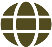
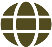
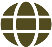
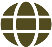
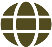
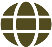
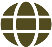
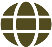
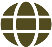
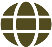
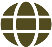
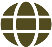
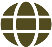
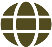
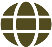
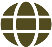
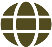
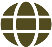
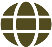
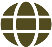
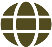
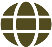
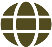
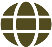
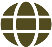
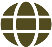
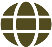
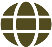
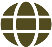
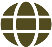
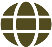
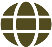
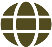
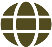
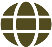
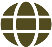
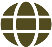
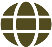
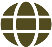
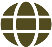
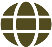
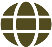
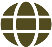
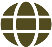
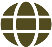
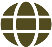
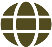
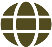
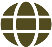
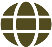
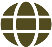
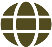
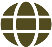
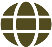
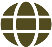
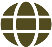
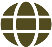
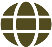
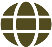
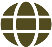
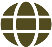
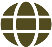
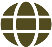
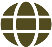
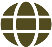
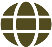
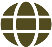
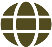
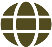
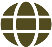
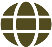
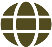
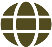
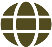
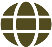
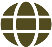
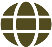
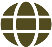
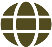
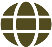
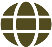
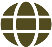
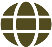
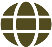
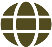
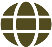
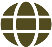
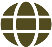
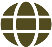
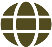
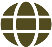
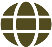
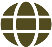
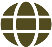
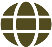
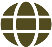
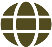
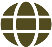
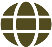
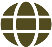
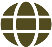
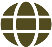
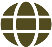
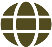
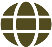
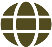
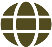
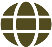
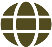
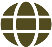
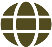
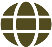
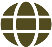
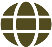
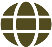
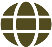
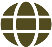
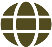
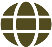
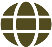
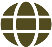
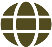
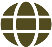
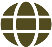
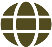
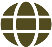
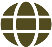
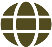
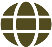
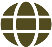
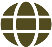
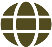
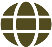
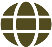
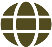
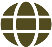
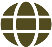
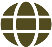
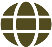
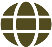
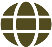
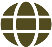
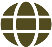
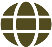
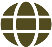
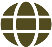
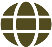
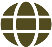
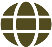
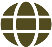
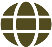
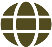
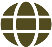
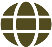
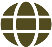
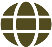
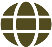
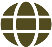
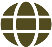
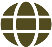
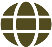
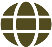
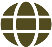
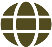
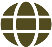
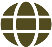
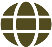
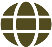
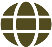
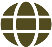
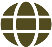
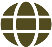
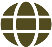
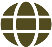
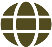
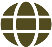
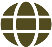
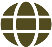
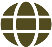
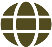
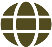
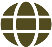
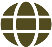
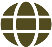
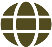
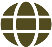
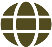
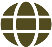
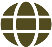
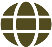
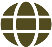
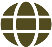
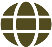
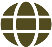
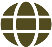
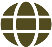
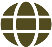
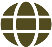
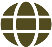
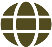
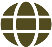
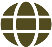
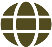
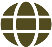
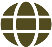
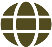
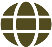
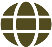
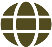
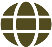
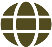
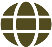
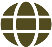
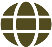
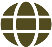
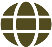
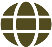
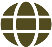
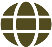
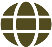
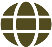
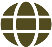
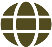
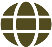
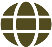
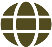
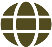
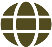
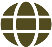
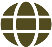
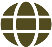
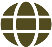
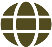
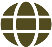
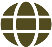
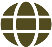
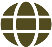
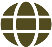
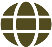
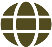
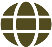
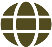
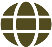
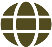
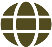
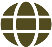
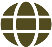
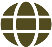
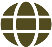
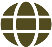
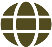
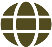
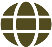
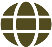
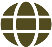
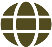
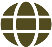
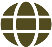
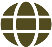
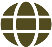
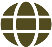
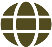
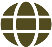
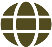
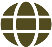
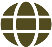
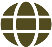
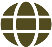
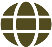
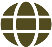
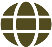
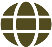
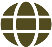
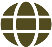
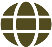
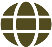
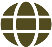
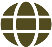
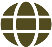
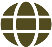
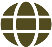
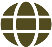
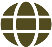
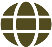
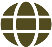
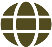
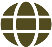
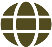
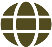
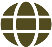
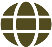
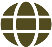
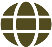
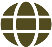
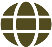
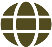
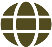
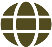
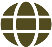
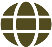
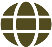
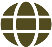
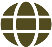
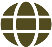
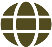
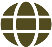
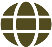
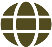
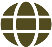
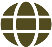
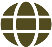
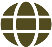
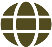
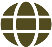
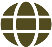
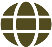
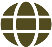
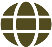
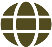
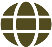
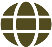
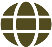
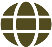
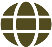
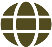
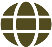
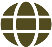
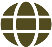
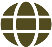
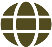
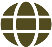
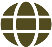
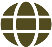
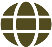
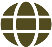
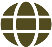
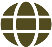
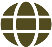
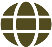
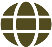
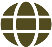
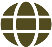
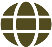
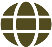
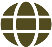
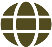
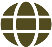
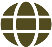
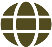
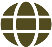
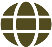
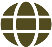
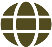
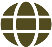
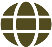
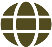
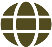
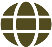
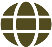
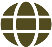
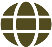
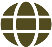
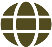
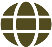
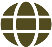
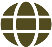
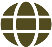
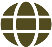
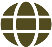
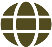
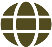
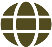
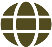
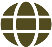
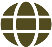
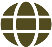
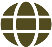
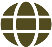
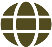
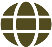
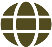
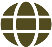
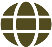
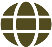
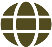
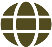
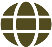
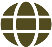
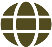
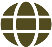
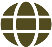
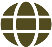
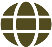
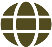
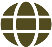
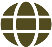
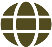
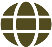
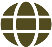
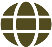
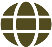
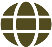
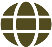
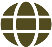
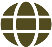
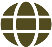
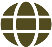
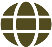
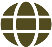
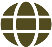
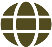
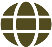
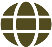
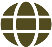
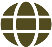
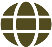
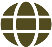
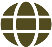
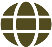
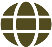
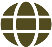
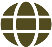
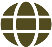
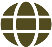
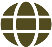
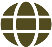
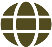
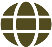
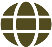
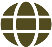
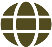
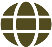
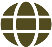
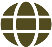
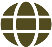
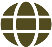
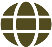
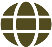
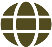
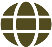
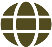
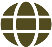
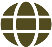
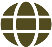
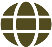
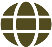
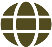
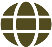
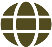
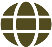
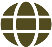
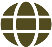
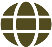
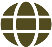
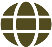
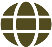
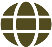
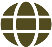
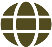
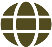
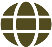
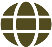
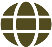
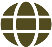
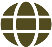
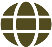
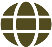
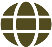
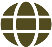
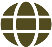
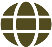
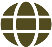
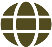
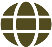
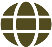
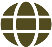
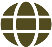
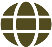
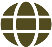
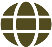
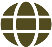
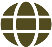
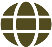
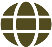
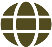
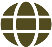
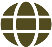
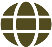
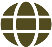
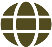
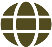
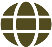
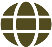
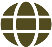
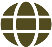
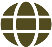
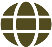
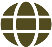
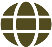
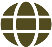
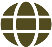
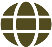
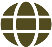
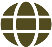
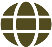
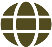
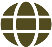
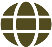
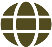
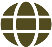
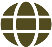
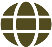
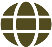
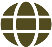
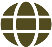
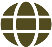
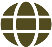
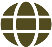
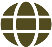
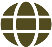
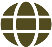
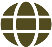
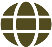
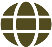
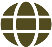
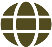
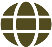
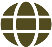
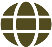
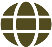
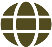
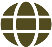
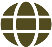
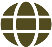
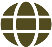
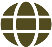
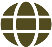
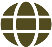
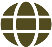
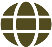
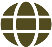
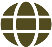
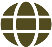
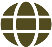
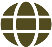
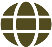
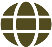
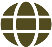
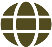
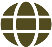
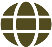
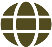
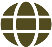
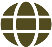
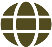
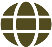
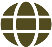
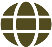
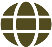
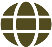
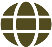
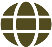
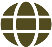
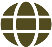
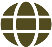
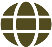
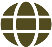
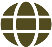
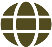
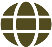
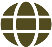
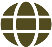
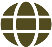
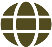
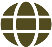
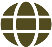
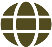
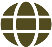
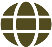
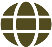
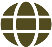
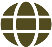
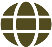
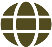
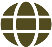
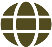
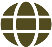
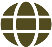
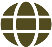
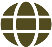
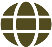
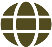
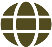
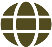
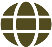
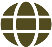
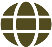
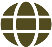
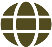
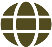
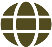
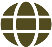
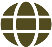
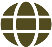
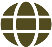
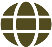
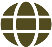
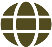
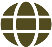
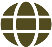
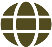
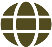
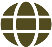
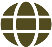
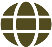
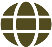
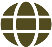
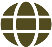
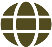
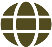
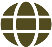
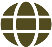
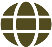
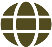
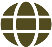
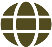
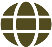
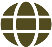
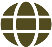
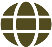

In [ ]:
# primera extracion ips origen

# Convertir la Serie a una lista de tuplas
tuplas_geo_lista = list(tuplas_geopd)

# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=tuplas_geo_lista[0], zoom_start=10)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for tupla in tuplas_geo_lista:
    # Cargar el ícono personalizado
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    
    # Agregar el marcador con el icono personalizado
    folium.Marker(location=tupla, icon=icono_personalizado).add_to(marker_cluster)

# Agregar un mapa de calor
HeatMap(tuplas_geo_lista).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen.html')

# Mostrar el mapa en la notebook
display(mapa)

In [ ]:
df_origen_2vez=pd.read_excel("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\EXCEL\ips_origen_2vez.xlsx")


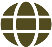
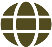
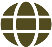
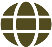
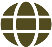
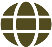
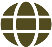
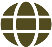
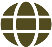
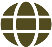
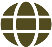
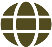
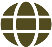
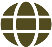
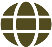
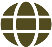
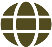
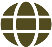
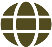
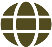
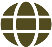
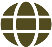
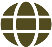
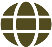
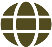
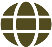
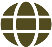
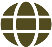
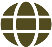
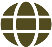
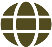
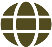
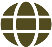
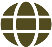
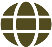
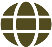
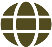
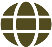
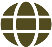
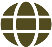
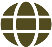
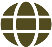
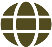
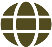
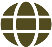
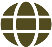
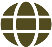
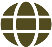
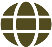
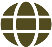
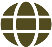
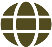
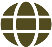
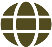
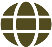
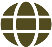
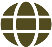
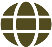
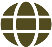
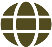
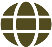
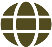
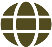
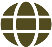
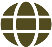
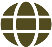
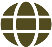
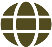
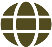
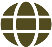
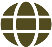
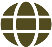
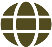
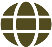
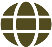
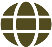
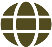
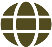
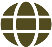
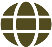
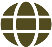
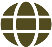
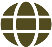
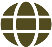
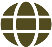
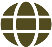
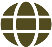
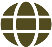
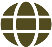
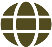
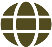
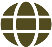
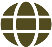
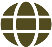
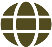
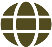
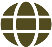
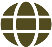
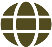
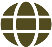
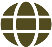
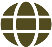
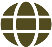
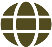
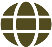
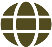
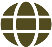
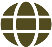
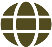
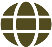
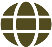
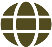
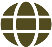
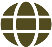
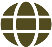
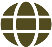
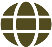
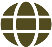
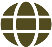
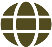
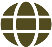
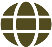
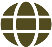
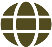
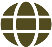
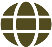
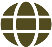
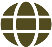
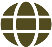
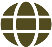
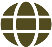
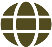
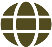
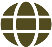
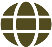
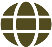
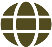
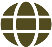
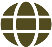
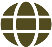
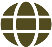
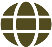
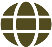
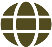
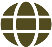
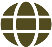
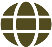
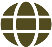
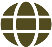
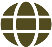
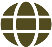
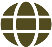
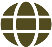
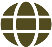
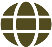
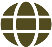
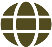
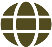
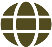
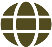
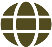
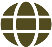
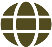
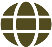
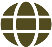
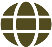
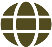
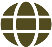
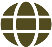
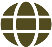
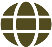
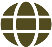
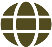
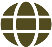
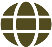
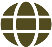
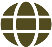
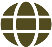
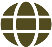
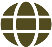
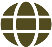
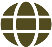
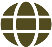
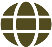
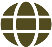
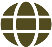
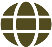
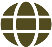
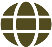
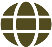
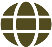
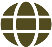
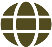
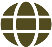
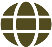
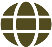
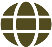
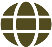
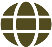
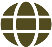
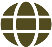
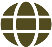
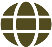
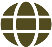
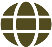
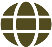
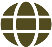
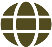
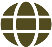
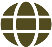
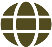
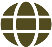
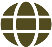
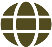
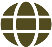
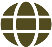
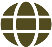
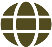
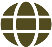
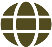
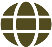
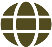
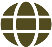
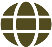
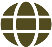
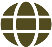
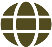
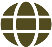
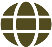
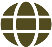
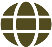
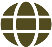
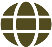
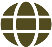
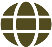
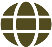
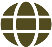
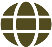
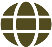
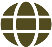
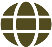
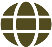
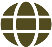
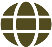
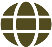
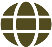
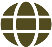
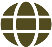
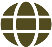
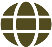
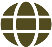
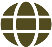
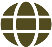
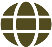
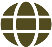
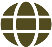
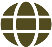
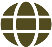
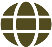
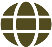
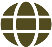
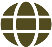
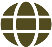
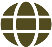
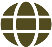
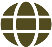
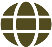
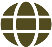
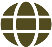
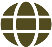
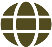
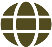
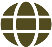
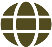
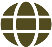
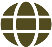
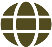
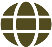
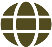
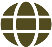
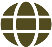
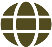
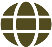
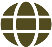
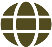
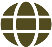
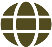
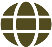
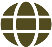
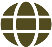
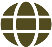
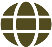
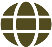
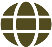
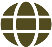
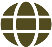
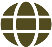
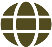
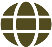
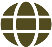
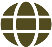
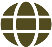
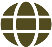
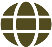
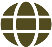
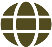
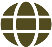
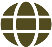
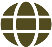
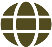
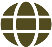
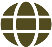
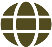
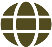
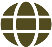
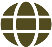
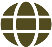
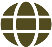
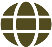
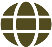
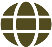
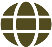
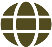
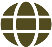
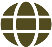
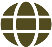
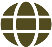
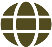
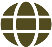
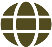
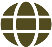
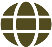
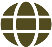
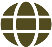
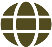
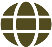
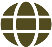
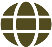
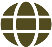
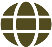
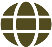
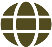
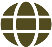
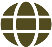
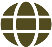
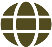
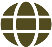
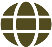
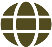
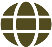
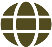
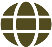
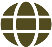
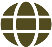
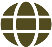
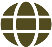
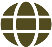
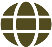
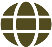
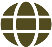
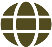
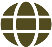
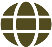
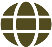
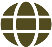
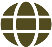
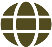
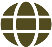
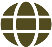
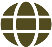
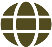
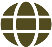
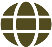
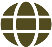
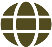
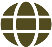
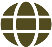
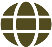
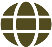
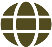
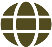
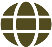
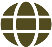
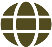
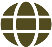
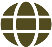
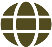
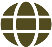
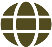
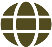
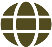
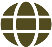
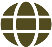
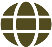
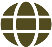
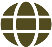
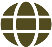
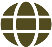
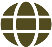
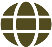
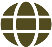
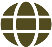
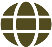
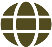
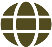
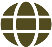
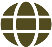
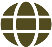
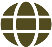
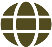
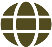
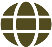
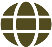
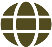
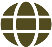
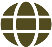
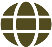
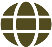
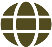
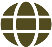
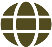
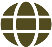
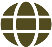
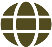
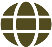
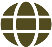
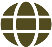
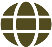
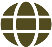
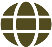
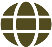
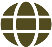
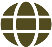
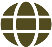
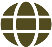
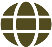
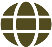
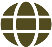
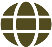
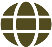
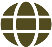
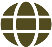
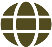
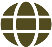
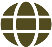
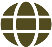
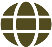
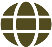
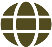
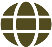
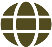
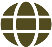
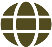
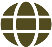
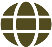
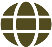
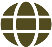
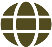
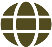
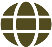
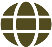
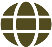
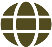
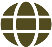
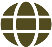
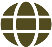
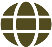
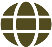
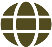
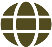
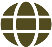
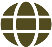
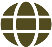
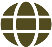
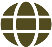
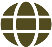
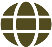
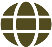
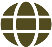
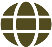
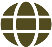
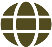
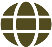
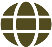
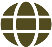
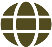
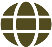
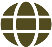
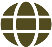
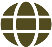
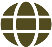
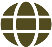
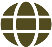
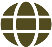
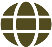
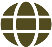
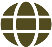
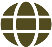
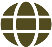
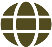
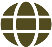
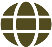
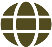
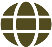
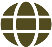
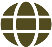
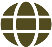
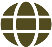
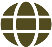
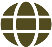
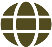
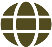
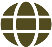
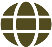
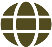
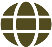
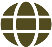
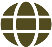
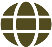
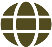
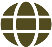
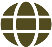
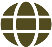
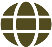
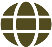
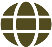
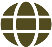
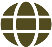
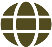
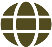
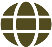
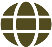
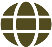
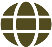
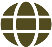
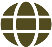
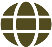
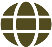
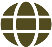
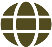
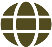
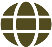
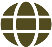
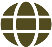
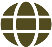
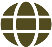
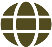
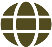
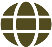
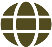
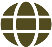
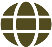
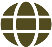
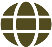
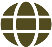
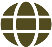
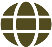
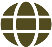
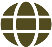
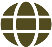
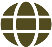
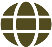
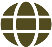
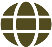
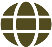
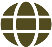
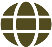
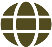
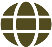
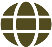
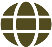
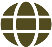
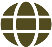
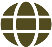
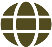
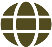
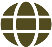
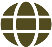
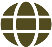
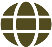
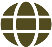
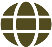
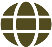
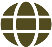
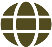
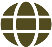
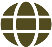
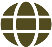
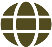
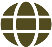
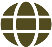
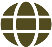
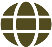
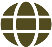
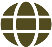
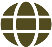
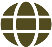
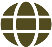
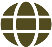
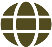
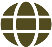
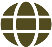
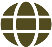
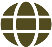
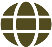
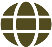
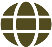
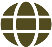
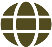
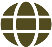
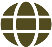
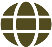
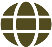
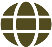
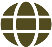
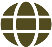
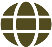
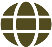
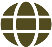
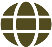
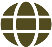
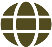
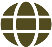
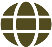
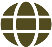
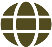
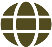
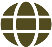
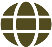
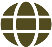
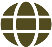
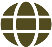
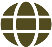
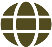
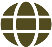
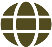
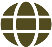
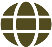
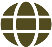
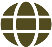
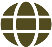
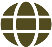
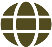
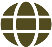
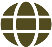
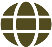
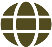
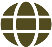
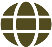
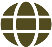
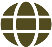
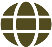
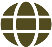
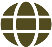
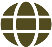
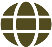
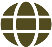
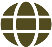
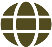
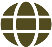
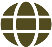
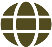
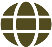
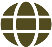
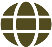
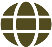
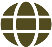
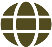
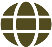
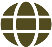
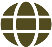
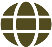
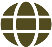
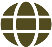
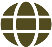
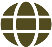
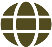
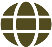
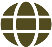
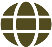
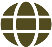
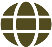
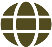
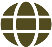
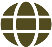
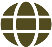
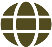
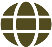
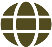
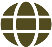
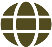
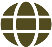
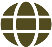
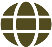
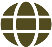
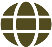
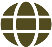
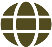
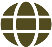
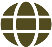
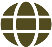
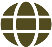
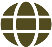
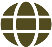
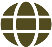
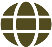
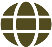
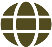
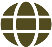
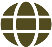
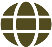
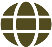
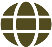
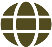
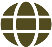
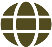
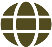
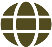
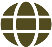
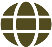
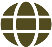
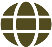
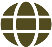
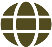
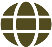
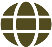
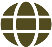
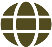
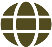
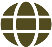
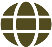
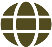
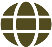
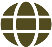
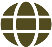
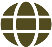
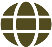
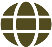
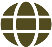
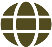
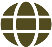
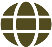
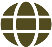
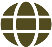
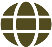
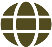
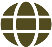
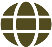
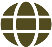
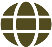
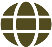
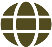
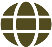
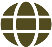
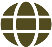
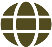
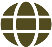
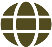
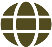
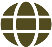
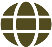
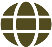
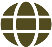
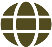
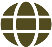
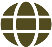
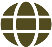
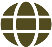
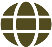
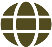
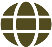
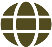
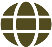
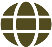
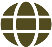
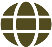
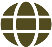
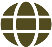
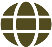
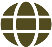
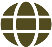
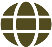
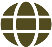
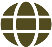
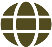
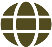
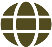
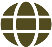
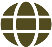
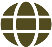
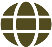
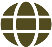
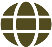
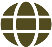
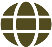
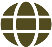
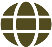
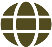
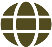
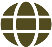
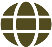
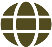
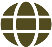
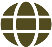
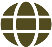
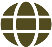
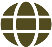
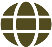
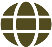
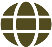
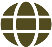
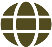
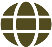
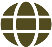
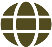
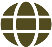
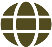
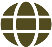
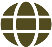
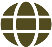
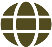
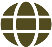
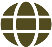
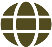
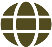
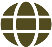
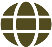
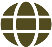
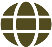
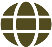
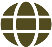
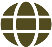
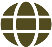
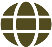
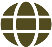
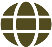
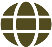
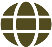
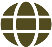
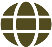
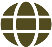
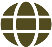
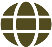
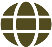
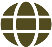
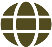
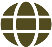
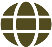
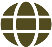
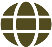
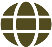
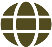
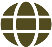
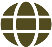
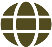
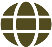
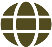
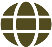
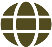
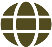
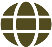
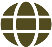
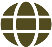
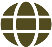
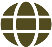
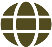
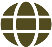
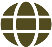
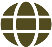
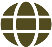
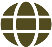
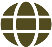
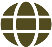
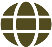
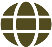
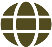
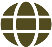
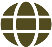
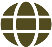
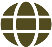
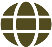
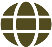
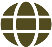
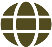
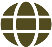
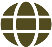
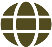
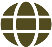
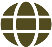
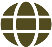
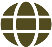
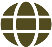
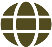
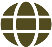
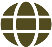
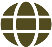
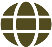
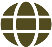
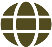
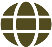
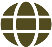
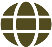
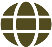
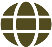
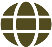
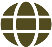
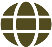
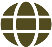
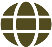
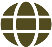
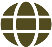
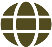
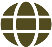
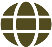
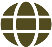
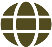
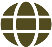
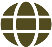
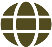
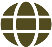
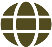
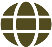
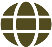
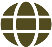
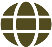
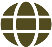
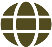
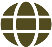
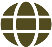
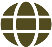
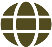
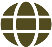
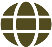
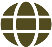
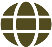
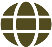
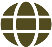
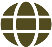
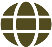
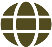
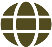
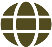
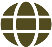
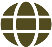
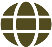
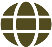
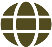
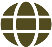
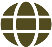
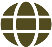
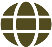
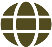
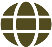
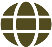
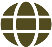
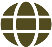
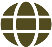
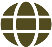
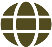
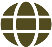
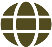
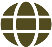
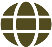
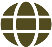
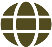
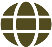
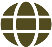
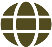
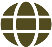
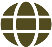
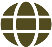
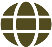
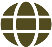
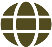
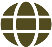
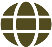
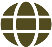
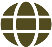
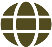
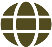
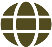
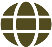
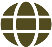
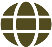
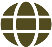
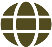
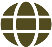
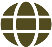
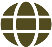
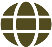
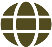
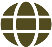
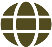
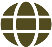
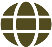
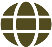
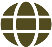
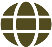
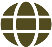
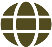
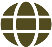
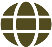
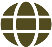
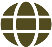
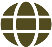
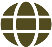
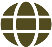
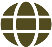
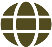
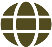
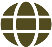
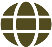
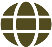
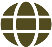
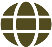
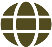
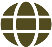
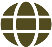
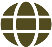
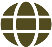
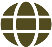
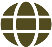
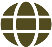
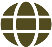
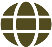
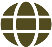
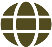
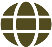
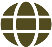
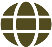
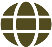
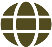
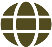
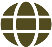
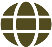
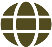
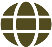
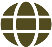
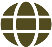
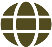
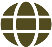
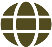
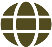
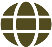
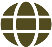
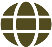
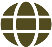
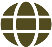
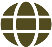
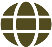
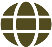
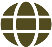
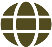
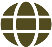
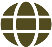
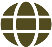
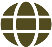
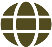
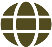
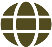
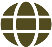
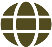
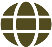
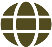
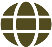
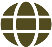
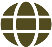
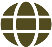
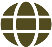
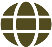
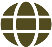
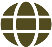
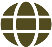
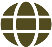
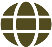
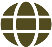
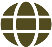
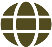
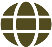
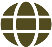
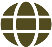
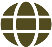
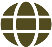
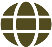
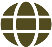
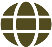
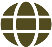
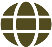
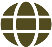
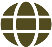
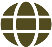
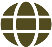
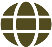
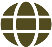
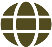
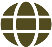
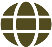
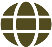
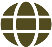
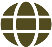
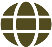
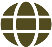
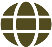
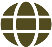
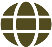
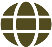
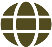
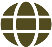
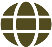
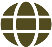
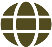
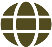
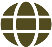
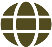
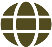
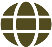
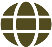
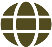
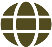
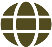
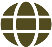
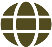
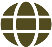
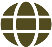
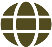
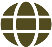
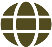
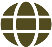
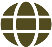
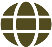
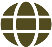
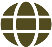
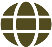
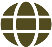
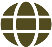
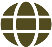
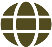
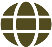
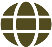
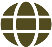
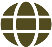
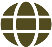
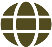
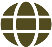
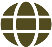
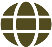
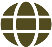
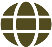
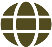
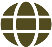
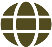
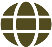
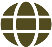
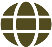
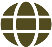
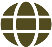
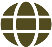
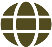
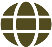
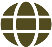
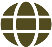
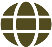
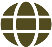
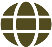
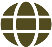
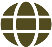
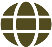
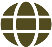
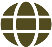
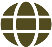
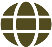
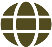
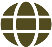
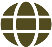
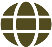
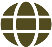
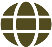
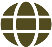
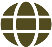
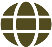
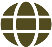
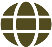
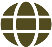
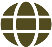
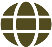
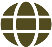
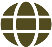
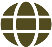
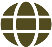
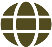
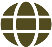
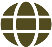
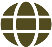
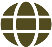
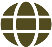
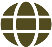
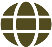
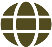
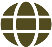
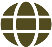
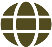
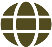
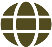
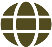
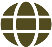
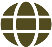
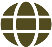
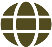
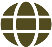
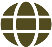
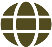
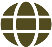
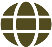
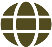
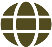
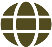
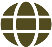
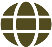
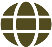
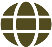
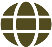
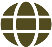
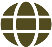
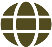
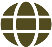
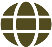
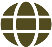
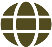
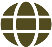
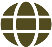
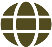
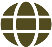
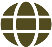
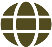
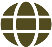
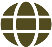
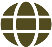
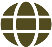
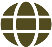
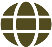
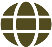
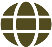
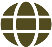
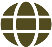
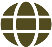
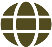
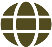
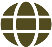
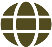
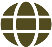
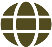
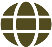
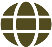
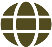
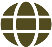
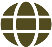
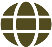
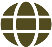
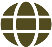
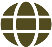
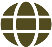
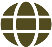
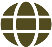
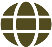
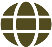
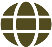
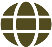
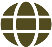
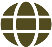
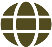
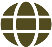
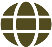
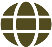
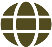
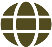
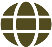
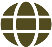
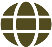
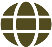
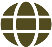
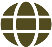
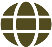
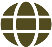
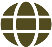
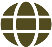
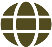
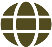
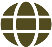
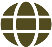
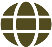
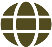
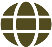
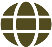
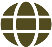
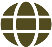
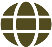
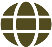
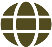
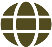
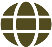
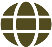
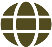
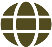
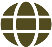
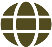
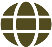
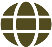
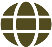
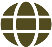
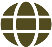
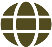
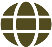
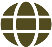
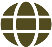
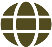
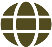
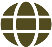
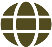
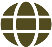
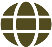
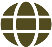
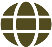
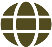
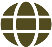
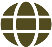
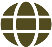
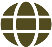
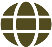
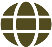
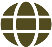
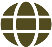
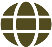
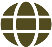
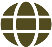
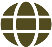
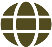
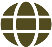
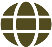
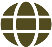
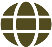
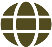
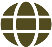
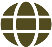
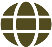
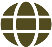
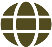
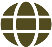
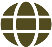
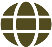
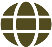
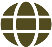
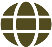
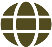
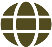
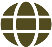
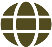
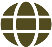
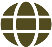
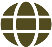
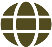
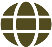
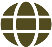
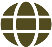
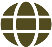
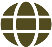
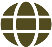
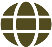
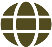
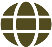
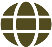
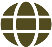
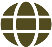
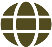
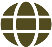
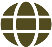
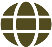
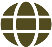
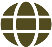
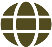
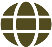
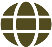
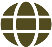
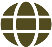
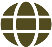
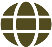
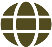
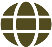
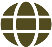
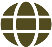
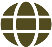
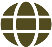
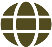
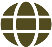
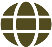
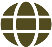
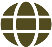
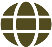
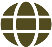
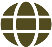
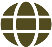
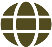
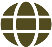
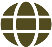
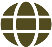
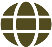
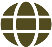
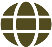
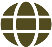
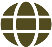
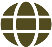
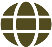
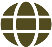
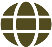
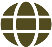
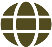
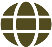
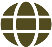
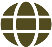
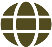
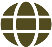
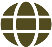
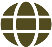
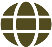
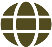
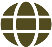
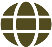

In [ ]:
# 2 VEZ CON 1426 ipS ORIGEN"

# Convertir la Serie a una lista 
lista_origen_2vez=df_origen_2vez.values.tolist()

# Crear un objeto de mapa centrado en la primera ubicación
mapa = folium.Map(location=lista_origen_2vez[0], zoom_start=10)

# Agregar un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Agregar marcadores al grupo con iconos personalizados
for tupla in lista_origen_2vez:
    # Cargar el ícono personalizado
    icono_personalizado = folium.CustomIcon(icon_image=r'C:\Users\victo\Pictures\internet_icon.png', icon_size=(30, 30))
    
    # Agregar el marcador con el icono personalizado
    folium.Marker(location=tupla, icon=icono_personalizado).add_to(marker_cluster)

# Agregar un mapa de calor
HeatMap(lista_origen_2vez).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ips_origen_2vez.html')

# Mostrar el mapa en la notebook
display(mapa)

In [ ]:
ciudades_array=np.array(['Shimoga,', 'Raichur,', 'Muzaffarnagar,', 'Bareilly,', 'Imphal,',
       'Dehradun,', 'Amaravati,', 'Farrukhabad,', 'Aurangabad,',
       'Varanasi,', 'Rampur,', 'Davanagere,', 'Jalna,', 'Begusarai,',
       'Mysore,', 'Rewa,', 'Bhavnagar,', 'Durgapur,', 'Anantapur,',
       'Tadepalligudem,', 'Ambarnath,', 'Bikaner,', 'Munger,', 'Dhule,',
       'Malegaon,', 'Karimnagar,', 'Firozabad,', 'Nanded,', 'Vadodara,',
       'Kadapa,', 'Solapur,', 'Sonipat,', 'Kishanganj,', 'Kota,',
       'Lucknow,', 'Nashik,', 'Siwan,', 'Sambalpur,', 'Kharagpur,',
       'Sikar,', 'Pune,', 'Giridih,', 'Phusro,', 'Anand,', 'Sagar,',
       'Akola,', 'Tirupati,', 'Darbhanga,', 'Ahmednagar,', 'Gandhinagar,',
       'Rajahmundry,', 'Nagercoil,', 'Bally,', 'Purnia,', 'Baranagar,',
       'Rohtak,', 'Jalgaon,', 'Dewas,', 'Deoghar,', 'Bangalore,',
       'Gopalpur,', 'Meerut,', 'Secunderabad,', 'Katihar,', 'Hosur,',
       'Gandhidham,', 'Hajipur,', 'Vijayawada,', 'Morbi,', 'Guntur,',
       'Ongole,', 'Kolhapur,', 'Morena,', 'Thrissur,', 'Khammam,',
       'Shahjahanpur,', 'Jaipur,', 'Alappuzha,', 'Bellary,', 'Alwar,',
       'Amritsar,', 'Kakinada,', 'Jehanabad,', 'Mathura,', 'Ulhasnagar,',
       'Mango,', 'Gaya,', 'Kulti,', 'Bettiah,', 'Haridwar,',
       'Muzaffarpur,', 'Ranchi,', 'Sasaram,', 'Thoothukudi,', 'Katni,',
       'Vasai-Virar,', 'Chandigarh,', 'Howrah,', 'Maheshtala,', 'Unnao,',
       'Satna,', 'Arrah,', 'Bhagalpur,', 'Tirunelveli,', 'Junagadh,',
       'Jamalpur,', 'Thanjavur,', 'Rajkot,', 'Bhiwandi,', 'Pondicherry,',
       'Loni,', 'Chittoor,', 'Kozhikode,', 'Barasat,', 'Salem,',
       'Bhiwani,', 'Bhubaneswar,', 'Ballia,', 'Srikakulam,', 'Panchkula,',
       'Cuttack,', 'Jabalpur,', 'Dharmavaram,', 'Srinagar,',
       'Tinsukia,', 'Mangalore,', 'Pudukkottai,', 'Dibrugarh,',
       'Shivpuri,', 'Bahraich,', 'Chapra,', 'Sambhal,', 'Bilaspur,',
       'Hindupur,', 'Gangtok,', 'Jammu,', 'Shimla,', 'Fatehpur,',
       'Tumkur,', 'Mirzapur,', 'Miryalaguda,', 'Bhind,', 'Ichalkaranji,',
       'Nizamabad,', 'Ozhukarai,', 'Chinsurah,'])

In [ ]:
paises_array=np.array(['Rajasthan', 'Sikkim', 'Punjab', 'Meghalaya', 'Chhattisgarh',
       'Jharkhand', 'Assam', 'Maharashtra', 'Haryana', 'Goa', 'Manipur',
       'Telangana', 'Uttarakhand', 'Gujarat', 'Mizoram', 'Tripura',
       'Kerala', 'Odisha', 'Karnataka', 'Bihar', 'Nagaland'])

In [ ]:
# los paso a series panda
ciudades_pd=pd.Series(ciudades_array)
                      
paises_pd=pd.Series(paises_array)

In [ ]:
# Series pandasciudades y otra con países
ciudades_pd=pd.Series(ciudades_array)                   
paises_pd=pd.Series(paises_array)

# Crear un DataFrame combinando las dos Series
df = pd.DataFrame({'Ciudad': ciudades_pd, 'Pais': paises_pd})

#Crear un objeto de mapa centrado en una ubicación de referencia (usando el centro de la India como ejemplo)
mapa = folium.Map(location=[22.3511148, 78.6677428], zoom_start=5)

# Crear un grupo de marcadores
marker_cluster = MarkerCluster().add_to(mapa)

# Crear un objeto geolocalizador
geolocalizador = Nominatim(user_agent="my_geocoder")

# Listas para almacenar las coordenadas de ciudades y países
ciudad_coords = []
pais_coords = []

# Agregar marcadores al grupo usando los datos del DataFrame y iconos personalizados
for index, row in df.iterrows():
    ciudad_icon = folium.Icon(color='blue', icon='info-sign')
    pais_icon = folium.Icon(color='green', icon='globe')

    # Geolocalizar la ciudad y agregar marcador
    ciudad_location = geolocalizador.geocode(row['Ciudad'])
    folium.Marker(location=[ciudad_location.latitude, ciudad_location.longitude],
                  icon=ciudad_icon,
                  popup=row['Ciudad']).add_to(marker_cluster)

    # Agregar las coordenadas de la ciudad a la lista
    ciudad_coords.append([ciudad_location.latitude, ciudad_location.longitude])

    # Geolocalizar el país y agregar marcador
    pais_location = geolocalizador.geocode(row['Pais'])
    folium.Marker(location=[pais_location.latitude, pais_location.longitude],
                  icon=pais_icon,
                  popup=row['Pais']).add_to(marker_cluster)

    # Agregar las coordenadas del país a la lista
    pais_coords.append([pais_location.latitude, pais_location.longitude])

# Añadir mapa de calor para ciudades
HeatMap(ciudad_coords, radius=15).add_to(mapa)

# Añadir mapa de calor para países
HeatMap(pais_coords, radius=15, gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(mapa)

# Mostrar el mapa en la notebook
mapa

# Guardar el mapa como un archivo HTML
mapa.save('E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\mapa_geolocalizado_ciudades_paises.html')


In [ ]:
df_modificado = pd.read_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx')
df_modificado.head()

Fecha_hora       IP Origen       Destino IP  Puerto_origen  \
0 2023-05-30 06:33:58   103.216.15.12     84.9.164.252          31225   
1 2020-08-26 07:08:30  78.199.217.198   66.191.137.154          17245   
2 2022-11-13 08:23:25    63.79.210.48    198.219.82.17          16811   
3 2023-07-02 10:38:46   163.42.196.10  101.228.192.255          20018   
4 2023-07-16 13:11:07   71.166.185.76  189.243.174.238           6131   

   Puerto_destino Protocolo  Longitud_paquete Tipo_paquete  Tipo  \
0           17616      ICMP               503         Data  HTTP   
1           48166      ICMP              1174         Data  HTTP   
2           53600       UDP               306      Control  HTTP   
3           32534       UDP               385         Data  HTTP   
4           26646       TCP              1462         Data   DNS   

                                    Datos_carga_util  ...     Firma_ataque  \
0  Qui natus odio asperiores nam. Optio nobis ius...  ...  Known Pattern B   
1  Aperiam quos modi officiis veritatis rem. Omni...  ...  Known Pattern A   
2  Perferendis sapiente vitae soluta. Hic delectu...  ...  Known Pattern B   
3  Totam maxime beatae expedita explicabo porro l...  ...  Known Pattern B   
4  Odit nesciunt dolorem nisi iste iusto. Animi v...  ...  Known Pattern B   

   respuesta_tomada Nivel_severidad Informacion_usuario  \
0            Logged             Low       Reyansh Dugal   
1           Blocked             Low          Sumer Rana   
2           Ignored             Low        Himmat Karpe   
3           Blocked          Medium          Fateh Kibe   
4           Blocked             Low        Dhanush Chad   

                             Informacion_dispositivo Segmento_red  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...    Segment A   
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...    Segment B   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...    Segment C   
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...    Segment B   
4  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...    Segment C   

  Datos_geolocalizacion Información_proxy Registros_cortafuegos  \
0    Jamshedpur, Sikkim      150.9.97.135              Log Data   
1    Bilaspur, Nagaland               NaN              Log Data   
2     Bokaro, Rajasthan    114.133.48.179              Log Data   
3    Jaunpur, Rajasthan               NaN                   NaN   
4    Anantapur, Tripura     149.6.110.119                   NaN   

  Fuente_registro  
0          Server  
1        Firewall  
2        Firewall  
3        Firewall  
4        Firewall  

[5 rows x 26 columns]

In [ ]:
 #ANALIS PREDICTIVO SEGUN ALGUNAS COLUMNAS DEL DATAFRAME PARA IDENTIFICAR PATRONES Y PREVER FUTUROS ATAQUES

# Selección de características relevantes para el modelo (puedes ajustar según tus necesidades)
features = df_modificado[['Resultado_analisis', 'Informacion_dispositivo', 'Datos_geolocalizacion', 'Registros_cortafuegos', 'Fuente_registro']]

# Convertir datos categóricos en variables dummy (si es necesario)
features = pd.get_dummies(features)

# Columna objetivo (etiqueta_x: normal o anomalo)
target = df_modificado['Etiqueta_x']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Crear un DataFrame con las métricas
# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({
    'Accuracy': [accuracy],
    'Confusion Matrix': [conf_matrix],
    'Classification Report': [classification_rep]
})

# Guardar las métricas en un archivo HTML
metrics_df.to_html(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\metricas_resultado predictivo.html', index=False)

# Guardar el modelo entrenado en un archivo
joblib.dump(model, 'modelo_random_forest.joblib')

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.628125
Confusion Matrix:
[[4226  276]
 [2699  799]]
Classification Report:
              precision    recall  f1-score   support

     anómala       0.61      0.94      0.74      4502
      normal       0.74      0.23      0.35      3498

    accuracy                           0.63      8000
   macro avg       0.68      0.58      0.54      8000
weighted avg       0.67      0.63      0.57      8000



In [ ]:
#Para cargar el modelo posteriormente y realizar predicciones:
# Cargar el modelo desde el archivo
loaded_model = joblib.load(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\predicciones fururos ataques\modelo_random_forest.joblib")

# Realizar predicciones en nuevos datos
nuevos_datos = [...]  # Ajusta esto con tus nuevos datos
predicciones_nuevos_datos = loaded_model.predict(nuevos_datos)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'ellipsis'